# Using Unsupervised learning - K means to segment Credit Card users

In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")


In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("C:\\Users\\akorade1\\Documents\\CIS-508\\assignment_5\\archive\\CCGENERAL.csv")

In [4]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [5]:
df['PURCHASES_FREQUENCY'].value_counts()

1.000000    2178
0.000000    2043
0.083333     677
0.916667     396
0.500000     395
0.166667     392
0.833333     373
0.333333     367
0.250000     345
0.583333     316
0.666667     310
0.750000     299
0.416667     289
0.090909      43
0.125000      32
0.909091      28
0.100000      27
0.142857      26
0.875000      26
0.857143      25
0.900000      24
0.818182      21
0.545455      20
0.272727      19
0.454545      19
0.200000      19
0.111111      18
0.888889      18
0.636364      17
0.571429      16
0.181818      16
0.727273      15
0.300000      13
0.714286      13
0.222222      12
0.700000      11
0.600000      11
0.375000      10
0.363636      10
0.800000       9
0.428571       9
0.400000       9
0.285714       8
0.625000       8
0.555556       7
0.777778       6
0.444444       5
Name: PURCHASES_FREQUENCY, dtype: int64

In [6]:
df['BALANCE'].describe()

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
25%        128.281915
50%        873.385231
75%       2054.140036
max      19043.138560
Name: BALANCE, dtype: float64

In [5]:
df = df.drop(["CUST_ID"], axis=1)

In [6]:
df = df.replace(np.nan, 0)

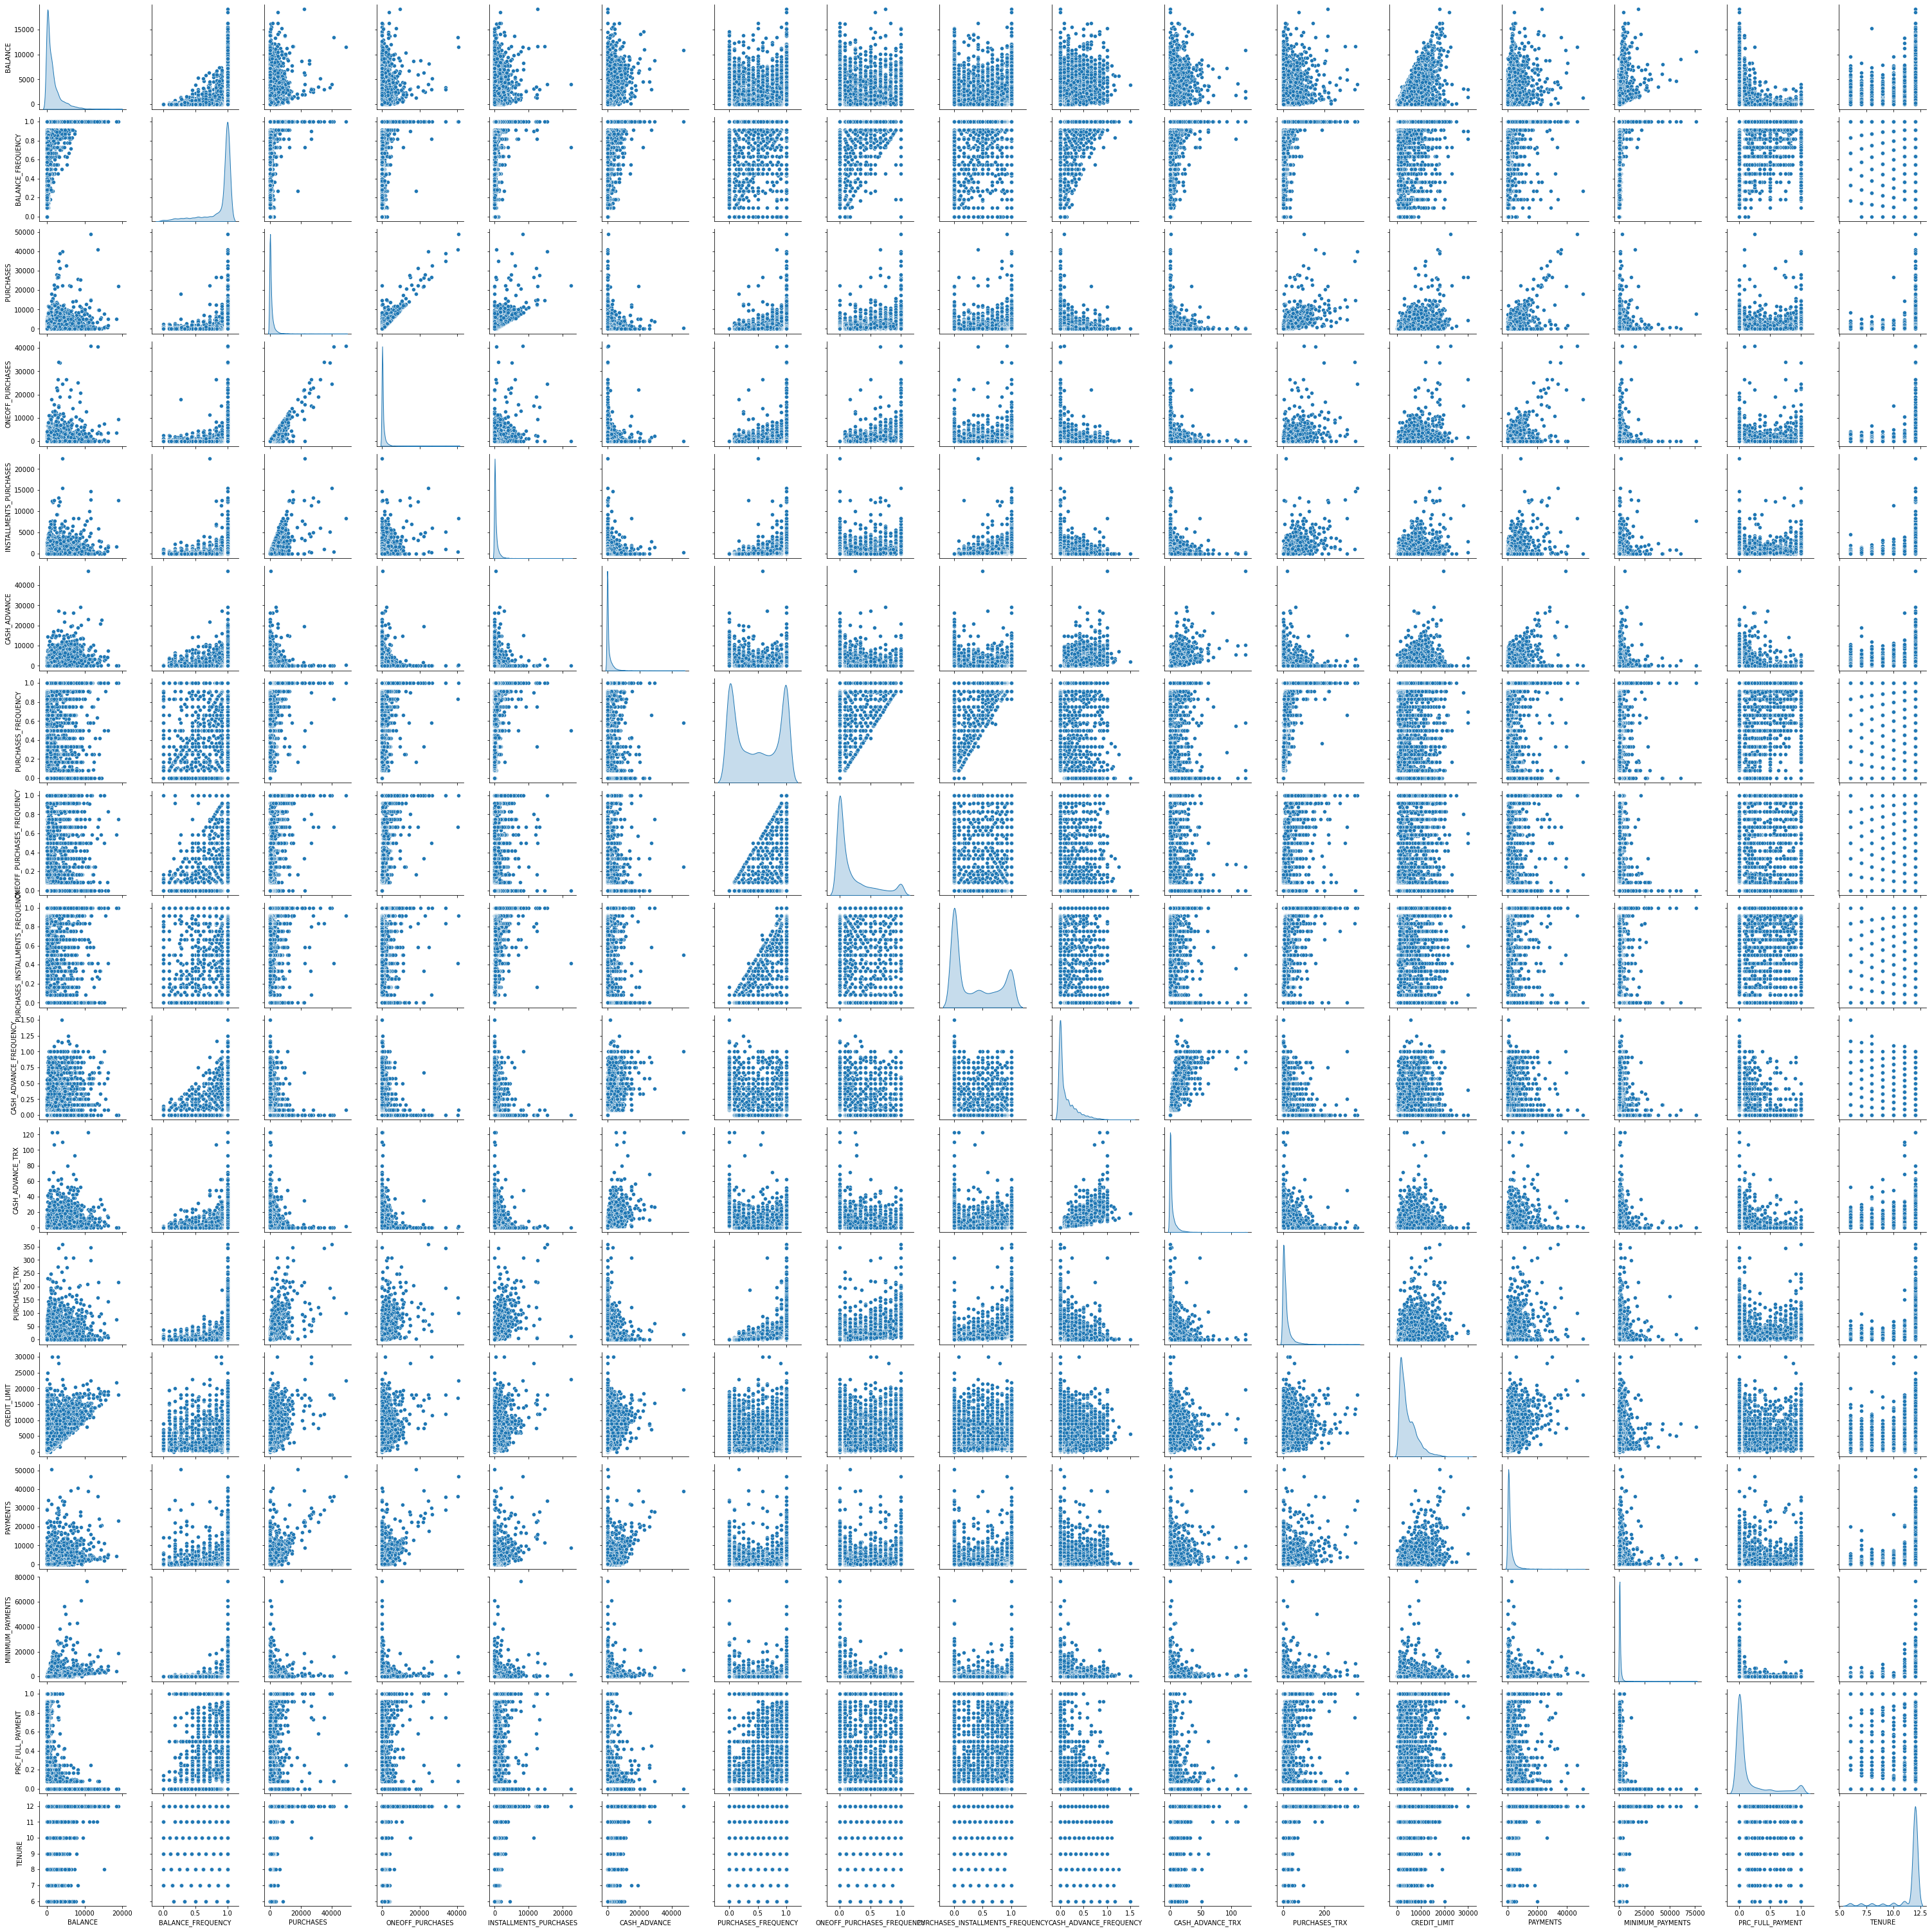

In [9]:
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

In [7]:
df_scaled = df.apply(zscore)


In [11]:
df_scaled.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960213   
1                0.573963          0.110074      -0.591796      0.688718   
2               -0.675349         -0.476070      -0.109020      0.826129   
3               -0.258913         -0.329534      -0.551565      0.826129   
4               -0.675349         -0.476070      -0.551565     -0.905249   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  
0 -0.528979         -0.297310         -0.525551  0.36068  
1  0.818642          0.102042          0.234227  0.36068  
2 -0.383805         -0.088489         -0.525551  0.36068  
3 -0.598688         -0.357035         -0.525551  0.36068  
4 -0.364368         -0.252238         -0.525551  0.36068

# Different Cluster values

# K = 3

In [13]:
model = KMeans(n_clusters = 5)

In [14]:
model

KMeans(n_clusters=5)

In [15]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 10 )
    clusters.fit(df_scaled)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0              1   152150.000000
1              2   127784.188143
2              3   111967.041949
3              4    99055.628556
4              5    91484.996557
5              6    84811.546358
6              7    79839.780557
7              8    74448.465395
8              9    69932.771400
9             10    66438.769239
10            11    63612.168429
11            12    61345.035620
12            13    59152.833085
13            14    57490.303954

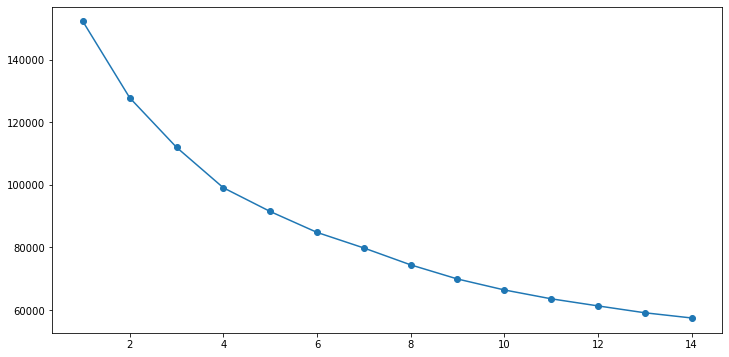

In [16]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Looking at the elbow plot defining 2 clusters gives minimum error hence, trying K=4

# K = 4

In [14]:
kmeans = KMeans(n_clusters=4)

In [15]:
kmeans.fit(df_scaled)

KMeans(n_clusters=4)

In [16]:
centroids = kmeans.cluster_centers_

In [17]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [22]:
centroid_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.321755           0.242492   0.109083          0.000939   
1  1.458758           0.384418  -0.234341         -0.163703   
2  0.954485           0.462694   3.125845          2.713251   
3 -0.263963          -0.368053  -0.343117         -0.230466   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.255974     -0.366732             0.983944   
1               -0.253433      1.691062            -0.504612   
2                2.406470     -0.155091             1.136338   
3               -0.387689     -0.181650            -0.797414   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.317283                          0.874358   
1                   -0.212237                         -0.449907   
2                    1.798653                          1.065918   
3                   -0.389447                         -0.713923   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.463030         -0.360443       0.297022     -0.076932   
1                1.749936          1.621294      -0.283143      0.838906   
2               -0.319096         -0.170458       3.003251      1.429898   
3               -0.101031         -0.164442      -0.474812     -0.333761   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0 -0.138802         -0.085699          0.395230  0.057654  
1  0.606587          0.500347         -0.406068 -0.098295  
2  1.919096          0.486542          0.454703  0.324140  
3 -0.261953         -0.127750         -0.259062 -0.052556

# Checking cluster centroid values to see if the clusters are well seperated

In [23]:
print(silhouette_score(df_scaled, kmeans.labels_))

0.19772818786827365


## Silhoette score is 0.19, which denotes overlapping clusters

In [24]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [25]:
# Joining the label dataframe with the input data frame to create df_labeled. 
df_labeled = df.join(df_labels)

In [26]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(3)
df_analysis

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     40.900749           0.818182      95.40              0.00   
1   3202.467416           0.909091       0.00              0.00   
2   2495.148862           1.000000     773.17            773.17   
3   1666.670542           0.636364    1499.00           1499.00   
4    817.714335           1.000000      16.00             16.00   
5   1809.828751           1.000000    1333.28              0.00   
6    627.260806           1.000000    7091.01           6402.63   
7   1823.652743           1.000000     436.20              0.00   
15  6886.213231           1.000000    1611.70              0.00   
21  6369.531318           1.000000    6359.95           5910.04   
23  3800.151377           0.818182    4248.35           3454.56   
57  2386.330629           1.000000    5217.62           4789.09   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.40      0.000000             0.166667   
1                     0.00   6442.945483             0.000000   
2                     0.00      0.000000             1.000000   
3                     0.00    205.788017             0.083333   
4                     0.00      0.000000             0.083333   
5                  1333.28      0.000000             0.666667   
6                   688.38      0.000000             1.000000   
7                   436.20      0.000000             1.000000   
15                 1611.70   2301.491267             0.500000   
21                  449.91    229.028245             1.000000   
23                  793.79   7974.415626             1.000000   
57                  428.53      0.000000             0.916667   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                     0.000000                          0.083333   
1                     0.000000                          0.000000   
2                     1.000000                          0.000000   
3                     0.083333                          0.000000   
4                     0.083333                          0.000000   
5                     0.000000                          0.583333   
6                     1.000000                          1.000000   
7                     0.000000                          1.000000   
15                    0.000000                          0.500000   
21                    0.916667                          1.000000   
23                    0.083333                          0.916667   
57                    0.916667                          0.500000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                 0.000000                 0              2        1000.0   
1                 0.250000                 4              0        7000.0   
2                 0.000000                 0             12        7500.0   
3                 0.083333                 1              1        7500.0   
4                 0.000000                 0              1        1200.0   
5                 0.000000                 0              8        1800.0   
6                 0.000000                 0             64       13500.0   
7                 0.000000                 0             12        2300.0   
15                0.166667                 4             11        8000.0   
21                0.333333                 6             92       11250.0   
23                0.333333                13             13        9000.0   
57                0.000000                 0             42        7500.0   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE labels  
0    201.802084        139.509787          0.000000      12      3  
1   4103.032597       1072.340217          0.222222      12      1  
2    622.066742        627.284787          0.000000      12      0  
3      0.000000          0.000000          0.000000      12      3  
4    678.334763        244.791237          0.000000      1

In [27]:
df_labeled['labels'].value_counts()

3    3980
0    3366
1    1195
2     409
Name: labels, dtype: int64

## Segmentation result 

In [18]:
from mpl_toolkits.mplot3d import Axes3D

## Checking the clustering outcome using 3D plot

## Plotting Balance, Purchase frequency, and purchase installment frequency to check if the clusters are well defined

In [19]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

Text(0.5, 0.92, '3D plot of KMeans Clustering')

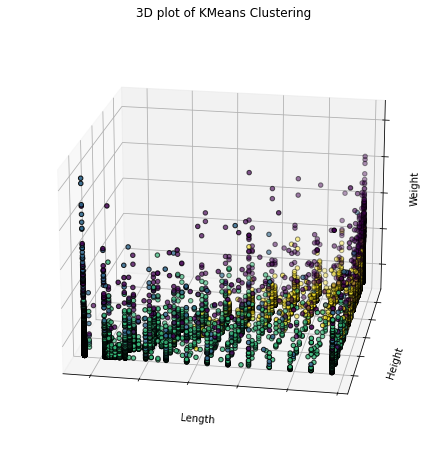

In [22]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans.fit(df_scaled)
labels = kmeans.labels_
ax.scatter(df_scaled.iloc[:, 8], df_scaled.iloc[:, 6], df_scaled.iloc[:, 0],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')


# Looking at the plot it is evident that the clusters are overlapping

## Analysing Cluster Labels with respect to - Balance and Purchase Frequency 

In [33]:
df_analysis[["BALANCE","PURCHASES_FREQUENCY","labels"]]

BALANCE  PURCHASES_FREQUENCY labels
0     40.900749             0.166667      3
1   3202.467416             0.000000      1
2   2495.148862             1.000000      0
3   1666.670542             0.083333      3
4    817.714335             0.083333      3
5   1809.828751             0.666667      0
6    627.260806             1.000000      2
7   1823.652743             1.000000      0
15  6886.213231             0.500000      1
21  6369.531318             1.000000      2
23  3800.151377             1.000000      1
57  2386.330629             0.916667      2

In [34]:
df_new = df_labeled.groupby(['labels'], axis = 0)

In [35]:
df_exp = df_new[["BALANCE","PURCHASES_FREQUENCY","labels"]]

In [36]:
df_exp.head(10)

BALANCE  PURCHASES_FREQUENCY labels
0       40.900749             0.166667      3
1     3202.467416             0.000000      1
2     2495.148862             1.000000      0
3     1666.670542             0.083333      3
4      817.714335             0.083333      3
5     1809.828751             0.666667      0
6      627.260806             1.000000      2
7     1823.652743             1.000000      0
8     1014.926473             0.333333      3
9      152.225975             0.166667      3
10    1293.124939             1.000000      0
11     630.794744             0.250000      3
12    1516.928620             1.000000      0
13     921.693369             0.750000      0
14    2772.772734             0.000000      3
15    6886.213231             0.500000      1
16    2072.074354             0.000000      3
17      41.089489             0.416667      3
18    1989.072228             0.666667      0
19    3577.970933             1.000000      0
20    2016.684686             0.666667      0
21    6369.531318             1.000000      2
22     132.342240             1.000000      0
23    3800.151377             1.000000      1
24    5368.571219             0.000000      1
26    1615.967240             0.166667      3
28    7152.864372             0.666667      1
30   12136.219960             1.000000      1
32    6732.823064             0.083333      1
36    7427.076941             0.000000      1
38    6269.418144             0.083333      1
39    1411.602230             0.083333      1
57    2386.330629             0.916667      2
84    1935.362486             1.000000      2
90    9381.255094             1.000000      2
102   3539.801912             0.916667      2
109   6644.201651             1.000000      2
120   8504.876253             1.000000      2
122   2114.158683             1.000000      2
125   2392.917738             0.916667      2

In [37]:
df_labeled.to_csv("C:\\Users\\akorade1\\Documents\\CIS-508\\assignment_5\\2dec_res2.csv")

In [ ]:
# Attached excel sheet with the analysis results

In [38]:
k = 4
columns_sel = ['BALANCE', 'PURCHASES_FREQUENCY']
for col in (columns_sel):
    #print(col)
    count_ = {}

    for c in range(k):
        count_[c] = 0
        
    for i in range(len(df_labeled)):
        c = df_labeled['labels'][i]
        count_[c] += (df_labeled[col][i])/len(df_labeled[df_labeled['labels'] == c])
        
    plt.xticks(np.arange(k))
    plt.title('Mean '+col+ ' by Clusters')
    plt.xlabel('Clusters')
    plt.ylabel(col)
    plt.grid(False)

    plt.bar(count_.keys(), count_.values(), color=['orange', 'b','g'])
    plt.show()

## Higher Purchase frequency customers belong to cluster 0 and cluster 2

## Cluster 1 and 3 have customers with lower purchase frequency 

## Cluster 0 and 3 have customers with lower balances

In [ ]:
# the company can create the marketing stratergy based on these segments